In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def scrape_population_data():
    url = "https://www.worldometers.info/world-population/population-by-country/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"id": "example2"})

    if not table:
        print("Unable to locate the population table on the website.")
        return []

    data = []
    rows = table.find_all("tr")
    for row in rows[1:]:
        columns = row.find_all("td")
        if len(columns) >= 2:  # Ensure it has at least 2 columns
            country = columns[1].text.strip()
            population = int(columns[2].text.strip().replace(",", ""))
            area = int(columns[6].text.strip().replace(",", "") or 0)
            data.append((country, population, area))

    if not data:
        print("No population data found on the website.")

    return data

In [ ]:
population_data = scrape_population_data()

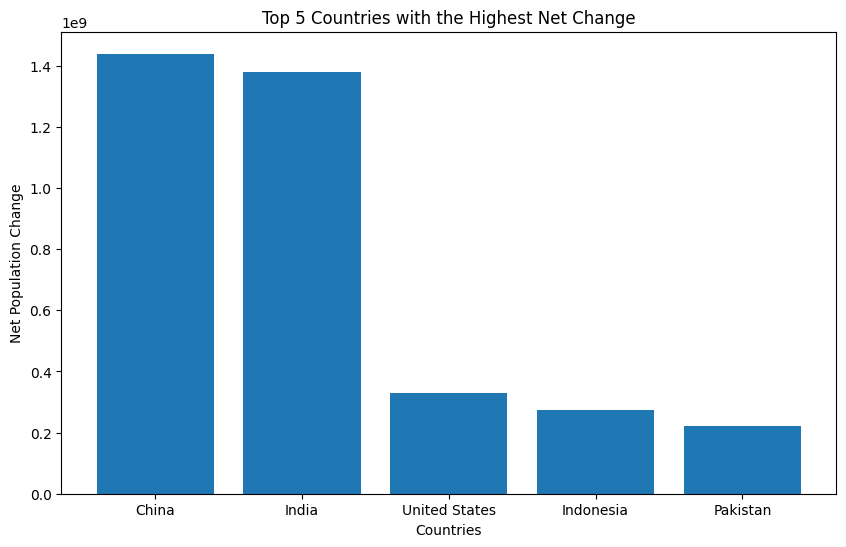

In [ ]:
def net_change(data):
    # Sort by net population change
    sorted_by_net_change = sorted(data, key=lambda x: x[1], reverse=True)
    top_countries_net_change = [entry[0] for entry in sorted_by_net_change[:5]]
    top_net_change = [entry[1] for entry in sorted_by_net_change[:5]]

    # Plotting the bar charts
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries_net_change, top_net_change)
    plt.xlabel('Countries')
    plt.ylabel('Net Population Change')
    plt.title('Top 5 Countries with the Highest Net Change')

    plt.show()

# Display Net_change insight
net_change(population_data)

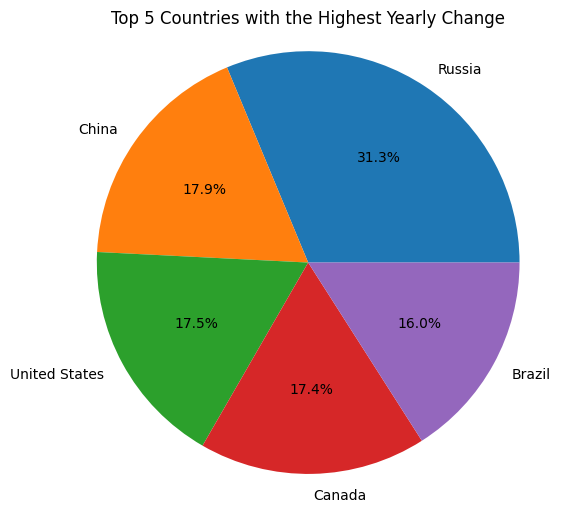

In [ ]:
def yearly_change(data):
    # Sort by yearly population change
    sorted_by_yearly_change = sorted(data, key=lambda x: x[2], reverse=True)
    top_countries_yearly_change = [entry[0] for entry in sorted_by_yearly_change[:5]]
    top_yearly_change = [entry[2] for entry in sorted_by_yearly_change[:5]]

    # Plotting the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(top_yearly_change, labels=top_countries_yearly_change, autopct='%1.1f%%')
    plt.title('Top 5 Countries with the Highest Yearly Change')
    plt.axis('equal')
    plt.show()

# Display Yearly Change insight
yearly_change(population_data)


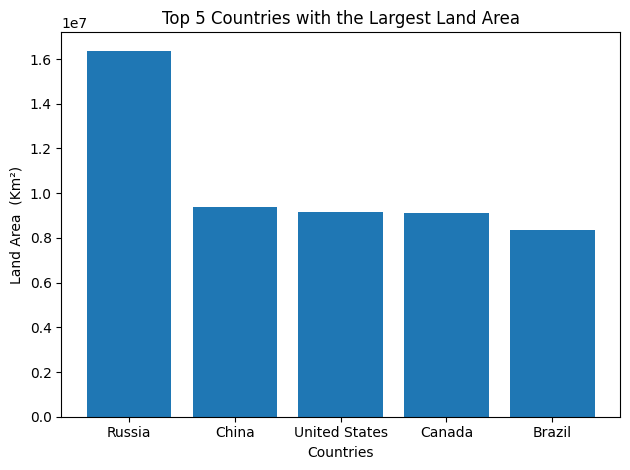

In [ ]:
def land_area(data):
    # Sort by land area
    sorted_by_land_area = sorted(data, key=lambda x: x[2], reverse=True)
    top_countries_land_area = [entry[0] for entry in sorted_by_land_area[:5]]
    top_land_area = [entry[2] for entry in sorted_by_land_area[:5]]

    plt.bar(top_countries_land_area, top_land_area)
    plt.xlabel('Countries')
    plt.ylabel('Land Area  (Km²)')
    plt.title('Top 5 Countries with the Largest Land Area')

    plt.tight_layout()
    plt.show()

# Display land area insight
land_area(population_data)